In [ ]:
# Import Library Pandas
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
import yfinance as yfin

yfin.pdr_override()

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
# Load Dataset BBCA.JK
start = datetime.datetime(2018,1,1)
end = datetime.datetime.now()


df = web.get_data_yahoo("ASII.JK",start,end)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-12,5550.0,5625.0,5550.0,5600.0,5600.0,28821000
2024-01-15,5600.0,5600.0,5500.0,5525.0,5525.0,79502600
2024-01-16,5525.0,5525.0,5475.0,5500.0,5500.0,44840900
2024-01-17,5500.0,5525.0,5350.0,5400.0,5400.0,114587100
2024-01-18,5400.0,5400.0,5325.0,5375.0,5375.0,71517600
2024-01-19,5375.0,5400.0,5300.0,5350.0,5350.0,52865000
2024-01-22,5350.0,5425.0,5225.0,5225.0,5225.0,169967200
2024-01-23,5150.0,5200.0,5075.0,5125.0,5125.0,176612600
2024-01-24,5150.0,5175.0,4980.0,5075.0,5075.0,246293300


In [ ]:
df.shape

(1510, 6)

In [ ]:
close_adj = df['Adj Close']
# mavg = moving average saham,
# set mavg = 100, dimana 100 menandakan 100 hari terakhir.
mavg = close_adj.rolling(window=100).mean()
mavg.tail(20)

Date
2023-12-28    5983.989194
2023-12-29    5972.852832
2024-01-02    5962.462417
2024-01-03    5950.826055
2024-01-04    5941.419443
2024-01-05    5931.262832
2024-01-08    5920.114321
2024-01-09    5909.703657
2024-01-10    5898.547046
2024-01-11    5889.853989
2024-01-12    5882.152832
2024-01-15    5872.963823
2024-01-16    5863.524814
2024-01-17    5853.823657
2024-01-18    5844.118452
2024-01-19    5834.409194
2024-01-22    5823.695889
2024-01-23    5811.490684
2024-01-24    5798.785479
2024-01-25    5784.846470
Name: Adj Close, dtype: float64

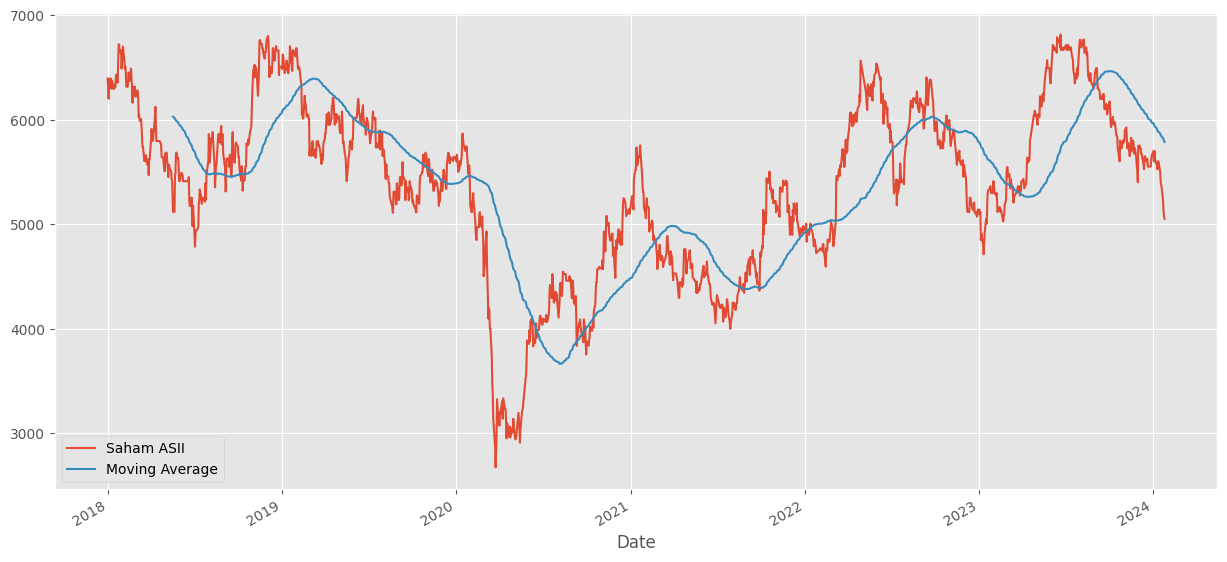

In [ ]:
# Plot Harga Saham dengan Moving Average nya:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Size of Matplotlib
import matplotlib as mpl
mpl.rc('figure',figsize = (15,7))
mpl.__version__

style.use('ggplot')

close_adj.plot(label = 'Saham ASII')
mavg.plot(label = 'Moving Average')
plt.legend()

In [ ]:
# Rets untuk menghitung perbedaan harga adj_close dari h-1 sebelum Market Close.
rets = close_adj / close_adj.shift(1) - 1
rets.head(5)
# Function rets berguna untuk prediction. Sangat penting untuk trader,
# karena dapat menghitung berapa persen profit/return yang diperoleh ketika Daily trading

Date
2018-01-01         NaN
2018-01-02   -0.012048
2018-01-03   -0.018293
2018-01-04    0.021739
2018-01-05    0.009119
Name: Adj Close, dtype: float64

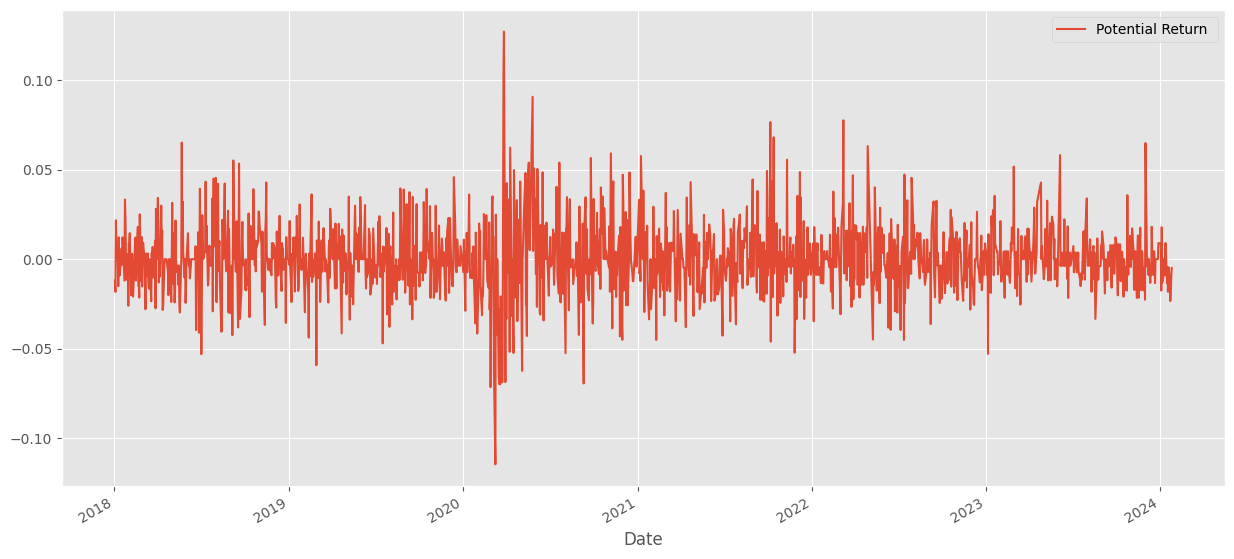

In [ ]:
rets.plot(label = 'Potential Return ')
plt.legend()
# Plot potential return/profit dari suatu saham. jika nilainya diatas 0, menandakan profit, jika dibawah 0 menandakan loss/rugi

In [ ]:
# Compare Harga Saham-Saham sejenis:
# membandingkan harga Adj Close saham saham Bank yang sejenis dengan BBCA:
dfcompare = web.get_data_yahoo(["ASII.JK","IMAS.JK","AUTO.JK","UNTR.JK"],start = start,end=end)['Adj Close']
dfcompare.rename(columns = {'ASII.JK':'ASII','IMAS.JK':'IMAS','AUTO.JK':'AUTO','UNTR.JK':'UNTR'},inplace = True)

[*********************100%%**********************]  4 of 4 completed


In [ ]:
dfcompare.tail(10)

Ticker,ASII,AUTO,IMAS,UNTR
Date,,,,
2024-01-12,5600.0,2600.0,1625.0,23900.0
2024-01-15,5525.0,2570.0,1555.0,24725.0
2024-01-16,5500.0,2570.0,1525.0,24600.0
2024-01-17,5400.0,2570.0,1600.0,24225.0
2024-01-18,5375.0,2540.0,1585.0,24100.0
2024-01-19,5350.0,2380.0,1545.0,24075.0
2024-01-22,5225.0,2400.0,1500.0,23250.0
2024-01-23,5125.0,2380.0,1445.0,22700.0
2024-01-24,5075.0,2350.0,1425.0,22550.0


In [ ]:
dfcompare.shape

(1510, 4)

In [ ]:
dfcompare

Ticker,ASII,AUTO,IMAS,UNTR
Date,,,,
2018-01-01,6391.626953,1595.366455,818.937866,22115.306641
2018-01-02,6314.619141,1610.855347,818.937866,21334.404297
2018-01-03,6199.107910,1603.110718,804.313965,20662.816406
2018-01-04,6333.870117,1595.366455,814.063171,21240.691406
2018-01-05,6391.626953,1587.621948,828.687134,22130.927734
...,...,...,...,...
2024-01-19,5350.000000,2380.000000,1545.000000,24075.000000
2024-01-22,5225.000000,2400.000000,1500.000000,23250.000000
2024-01-23,5125.000000,2380.000000,1445.000000,22700.000000


In [ ]:
# Function Correlation untuk mengecek apakah ada correlation harga antara Adj Close dengan harga sekarang
retscompare = round(dfcompare.pct_change(),4)

correlation = retscompare.corr()

correlation

Ticker,ASII,AUTO,IMAS,UNTR
Ticker,,,,
ASII,1.000000,0.305992,0.239946,0.370680
AUTO,0.305992,1.000000,0.252027,0.242292
IMAS,0.239946,0.252027,1.000000,0.171865
UNTR,0.370680,0.242292,0.171865,1.000000


Text(0, 0.5, 'Returns ASII')

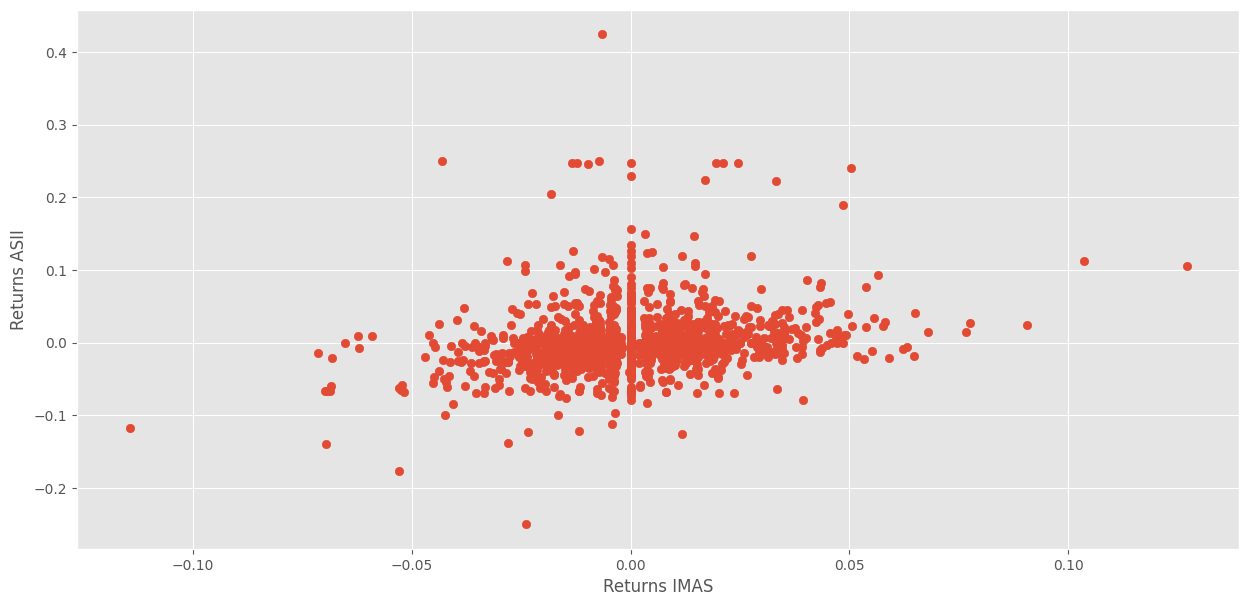

In [ ]:
# Cek Return dari Saham BBCA dan BBRI
plt.scatter(retscompare.ASII, retscompare.IMAS)
plt.xlabel('Returns IMAS')
plt.ylabel('Returns ASII')

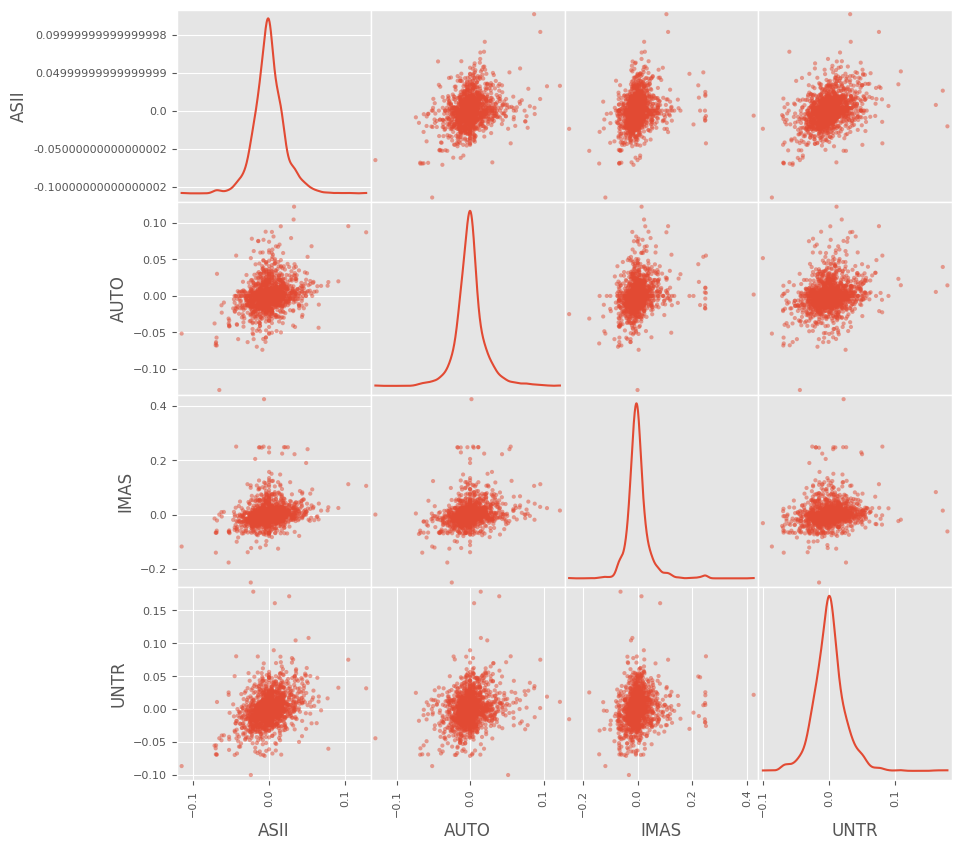

In [ ]:
# Plot Semua Saham yang ingin di predict:
from pandas.plotting import scatter_matrix
scatter_matrix(retscompare, diagonal = 'kde',figsize = (10,10));

([<matplotlib.axis.YTick at 0x7a03b8bd87c0>,
 [Text(0, 0, 'ASII'),
  Text(0, 1, 'AUTO'),
  Text(0, 2, 'IMAS'),
  Text(0, 3, 'UNTR')])

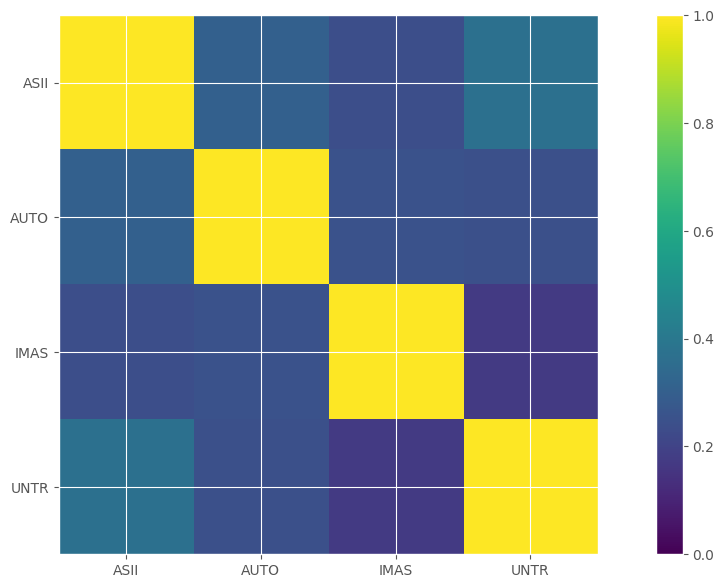

In [ ]:
# Cek Korelasi antar Saham:
plt.imshow(correlation, cmap= None, interpolation = 'none',vmin=0,vmax=1)
plt.colorbar()
plt.xticks(range(len(correlation)),correlation.columns)
plt.yticks(range(len(correlation)),correlation.columns)

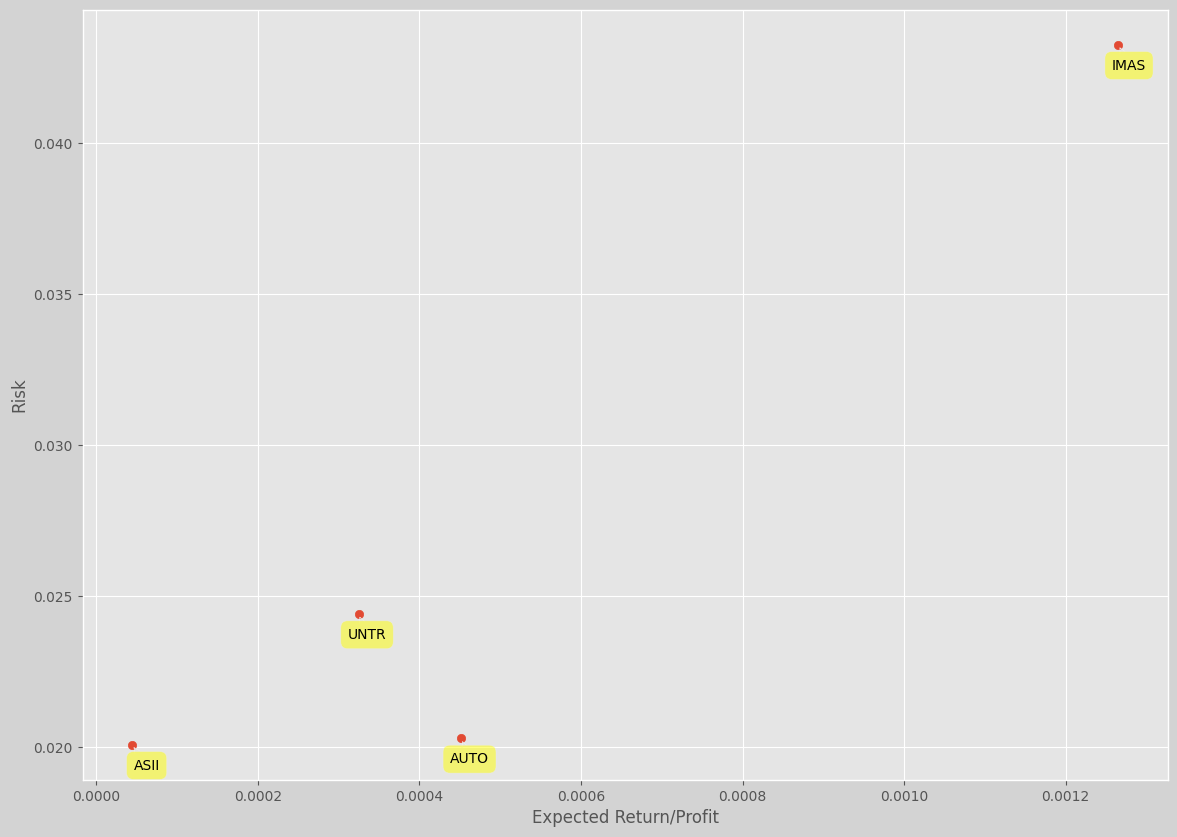

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already defined retscompare and other necessary variables

# Create a figure with a light gray background
fig = plt.figure(figsize=(14, 10), facecolor='lightgray')

# Scatter plot
plt.scatter(retscompare.mean(), retscompare.std())
plt.xlabel('Expected Return/Profit')
plt.ylabel('Risk')

# Annotate points
for label, x, y in zip(retscompare.columns, retscompare.mean(), retscompare.std()):
    plt.annotate(
        label,
        xy=(x, y), xytext=(20, -20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0')
    )

# Show the plot
plt.show()


In [ ]:
dfreg = df.loc[:,['Adj Close','Volume']]
# HL_PCT Untuk melakukan calculate Data Frame dimana harga High dan Low dari suatu saham:
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
# PCT_change Untuk melihat percentage change dari harga close dibandingkan harga open:
dfreg['PCT_change'] = (df['Close'] - df['Open'])/ df['Open'] * 100.0
print(dfreg.head())

dfreg1 = df.loc[:,['Adj Close','Volume']]
dfreg1['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg1['PCT_change'] = (df['Close'] - df['Open'])/ df['Open'] * 100.0

dfreg2 = df.loc[:,['Adj Close','Volume']]
dfreg2['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg2['PCT_change'] = (df['Close'] - df['Open'])/ df['Open'] * 100.0

              Adj Close    Volume    HL_PCT  PCT_change
Date                                                   
2018-01-01  6391.626953         0  0.000000    0.000000
2018-01-02  6314.619141  24661300  3.048780   -1.204819
2018-01-03  6199.107910  40976100  3.105590   -2.424242
2018-01-04  6333.870117  30604400  2.127660    1.857585
2018-01-05  6391.626953  18885300  2.108434    1.840491


In [ ]:
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate

dfreg.fillna(value = -99999, inplace = True)
print(dfreg.shape)

forecast_out = int(math.ceil(0.01 * len(dfreg)))

forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'],1))

X = preprocessing.scale(X)

X_lately = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(dfreg['label'])
y = y[:-forecast_out]

print('Dimension of X', X.shape)
print('Dimension of Y', y.shape)


(1510, 4)
Dimension of X (1494, 4)
Dimension of Y (1494,)


<ipython-input-18-c0ffa746caa2>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dfreg.drop(['label'],1))


In [ ]:
# Quadratic Model:
dfreg1.fillna(value = -99999, inplace = True)

forecast_out1 = int(math.ceil(0.01 * len(dfreg1)))

forecast_col1 = 'Adj Close'
dfreg1['label'] = dfreg1[forecast_col1].shift(-forecast_out1)
X1 = np.array(dfreg1.drop(['label'],1))

X1 = preprocessing.scale(X1)

X_lately1 = X1[-forecast_out1:]
X1 = X1[:-forecast_out1]

y1 = np.array(dfreg1['label'])
y1 = y1[:-forecast_out1]

# KNN Model:
dfreg2.fillna(value = -99999, inplace = True)

forecast_out2 = int(math.ceil(0.01 * len(dfreg2)))

forecast_col2 = 'Adj Close'
dfreg2['label'] = dfreg2[forecast_col2].shift(-forecast_out2)
X2 = np.array(dfreg2.drop(['label'],1))

X2 = preprocessing.scale(X2)

X_lately2 = X2[-forecast_out2:]
X2 = X2[:-forecast_out2]

y2 = np.array(dfreg2['label'])
y2 = y2[:-forecast_out2]

<ipython-input-19-1e0fc05f972e>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X1 = np.array(dfreg1.drop(['label'],1))
<ipython-input-19-1e0fc05f972e>:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X2 = np.array(dfreg2.drop(['label'],1))


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
clfreg = LinearRegression(n_jobs= -1)
clfreg.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [ ]:
clfpoly2 = make_pipeline(PolynomialFeatures(2),Ridge())
clfpoly2.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge())])

In [ ]:
clfpoly3 = make_pipeline(PolynomialFeatures(3),Ridge())
clfpoly3.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge())])

In [ ]:
clfknn = KNeighborsRegressor(n_neighbors = 2)
clfknn.fit(X2_train,y2_train)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
confidencereg = clfreg.score(X_test,y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X1_test,y1_test)
confidenceknn = clfknn.score(X2_test,y2_test)

print("The Linear Regression confidence is ", confidencereg)
print("The Quadratic Regression 2 confidence is ", confidencepoly2)
print("The Quadratic Regression 3 confidence is ", confidencepoly3)

print("The KNN Regression confidence is ", confidenceknn)

The Linear Regression confidence is  0.7945607104114465
The Quadratic Regression 2 confidence is  0.7911528520519989
The Quadratic Regression 3 confidence is  0.7852415148094655
The KNN Regression confidence is  0.6878348073740279


In [ ]:
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
print(forecast_set, confidencereg, forecast_out)

forecast_set1 = clfpoly3.predict(X_lately)
dfreg1['Forecast'] = np.nan
print(forecast_set1, confidencepoly3, forecast_out1)

forecast_set2 = clfknn.predict(X_lately)
dfreg2['Forecast'] = np.nan
print(forecast_set2, confidenceknn, forecast_out2)

[5678.89291564 5570.59518957 5536.22324379 5558.65868415 5551.01671723
 5534.6914107  5584.66318161 5548.13490063 5513.91018735 5444.28196934
 5426.951275   5370.67866355 5341.99898314 5315.85118343 5315.78268952
 5130.58012892] 0.7945607104114465 16
[5686.41183511 5610.16720219 5569.94591188 5553.67988395 5595.51495859
 5539.44536828 5547.36336613 5601.14173883 5493.64920303 5533.42418109
 5456.38476545 5375.40934867 5426.59190193 5020.2123968  4171.83836547
 5130.1671336 ] 0.7852415148094655 16
[5081.88964844 5578.15551758 5602.50756836 5903.73242188 5578.63842773
 5584.90869141 5126.18994141 5480.31420898 5125.75683594 5116.12646484
 5273.89257812 5315.43481445 5112.47167969 5285.16137695 4940.61083984
 5123.68139648] 0.6878348073740279 16


In [ ]:
last_date = dfreg.iloc[-1].name
last_unix = last_date

next_unix = last_unix + datetime.timedelta(days = 1)



In [ ]:
for i in forecast_set:
  next_date = next_unix
  next_unix += datetime.timedelta(days = 1)
  dfreg1.loc[next_date, :-1] = np.array([np.nan for _ in range(len(dfreg1.columns)-1)]) / i;





<ipython-input-29-bd4915faf729>:4: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  dfreg1.loc[next_date, :-1] = np.array([np.nan for _ in range(len(dfreg1.columns)-1)]) / i;


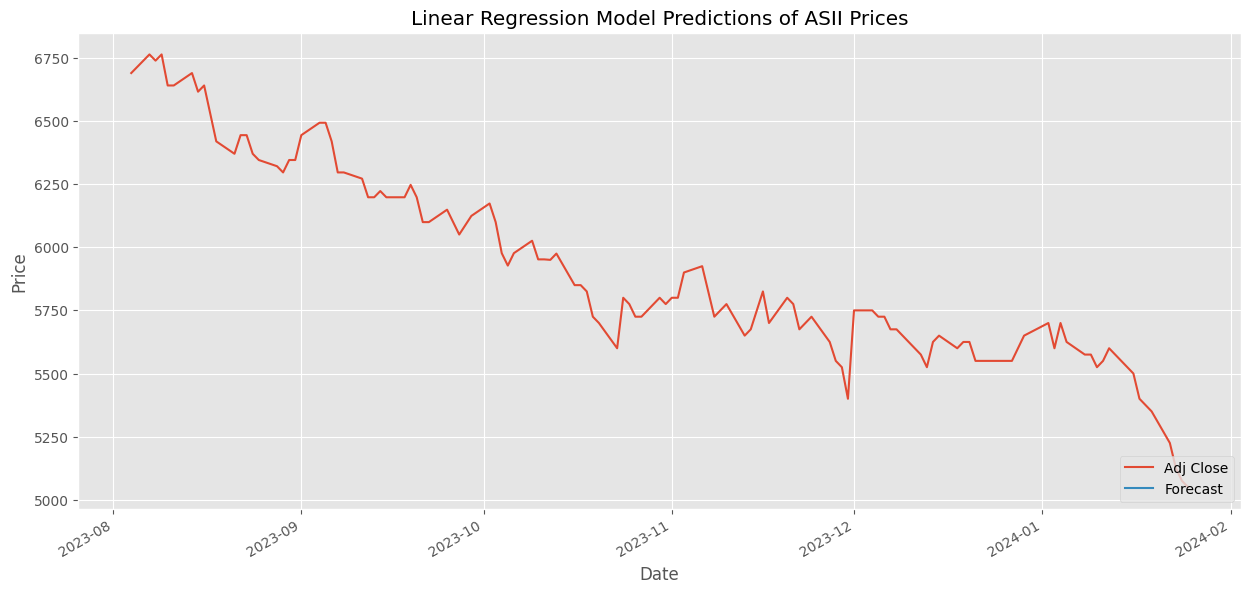

In [ ]:
dfreg['Adj Close'].tail(120).plot()
dfreg['Forecast'].tail(120).plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression Model Predictions of ASII Prices')
plt.show()

In [ ]:
last_date = dfreg1.iloc[-1].name
last_unix = last_date

next_unix = last_unix + datetime.timedelta(days = 1)

for i in forecast_set1:
  next_date = next_unix
  next_unix += datetime.timedelta(days = 1)
  dfreg1.loc[next_date] = [np.nan] * (len(dfreg1.columns) - 1) + [np.nan]  # Adding a trailing NaN
  dfreg1.loc[next_date] /= i


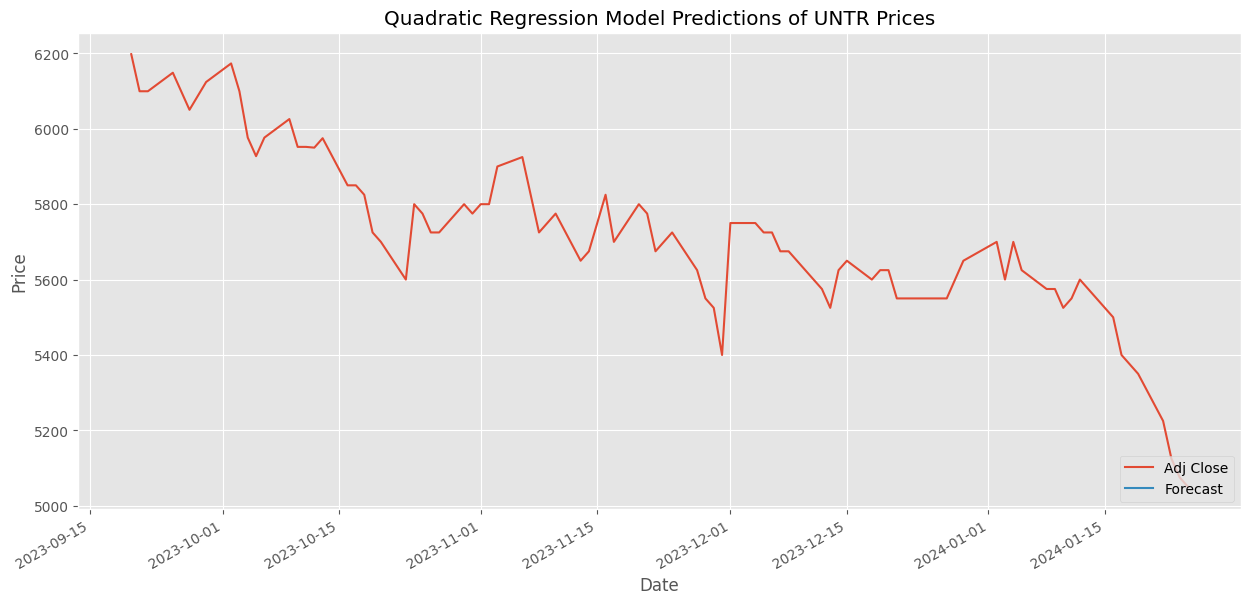

In [ ]:
dfreg1['Adj Close'].tail(120).plot()
dfreg1['Forecast'].tail(120).plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Quadratic Regression Model Predictions of IMAS Prices')
plt.show()